In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl

In [3]:
letters = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
company_symbol = [''.join(np.random.choice(letters,5)) for i in range(20)]

In [79]:
df = pd.DataFrame({
    'contract no':np.random.randint(111111,999999,(10000)),
    'stock_symbol':np.random.choice(company_symbol,10000),
    'buyer_broker':np.random.randint(1,20,10000),
    'seller_broker':np.random.randint(1,20,10000),
    'quantity':np.random.randint(50,1000,10000),
    'rate':np.random.randint(100,10000,10000),
    'date':[f"20{k}-{i}-{j}" for k in range(10,50) for i in range(1,11) for j in range(1,29)][:10000]
}).reset_index().rename(columns={'index':'sn'})

In [80]:
df["amount"] = df["quantity"]* df["rate"]
df['date']=pd.to_datetime(df['date'])

In [81]:
df.head()

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
0,0,823728,SMPWK,9,17,867,5062,2010-01-01,4388754
1,1,342676,PFLVV,15,17,622,1753,2010-01-02,1090366
2,2,936780,AIMLZ,1,19,568,860,2010-01-03,488480
3,3,880927,IQOQW,14,7,411,6148,2010-01-04,2526828
4,4,313365,IBVAI,7,6,990,5923,2010-01-05,5863770


# Top buyer broker

In [82]:
df.groupby(["buyer_broker"])["amount"].sum().sort_values(ascending= False)

buyer_broker
6     1548634821
19    1479086130
11    1471514405
15    1464112311
5     1456421400
2     1420374995
10    1405524100
16    1393140723
7     1388064491
8     1380933800
9     1374100561
17    1369684848
3     1368530757
4     1343033942
1     1337263736
12    1335017069
13    1325660990
14    1310478606
18    1307737534
Name: amount, dtype: int32

# top seller broker

In [83]:
df.groupby(["seller_broker"])["amount"].sum().sort_values(ascending= False)

seller_broker
15    1537947254
6     1508150675
9     1499856261
12    1495499534
10    1472639272
3     1467147725
2     1446149269
5     1414400370
11    1410009658
7     1403034578
16    1367986384
19    1359804352
8     1355963657
1     1349175418
4     1322110438
17    1308591097
18    1273149648
14    1269451957
13    1218247672
Name: amount, dtype: int32

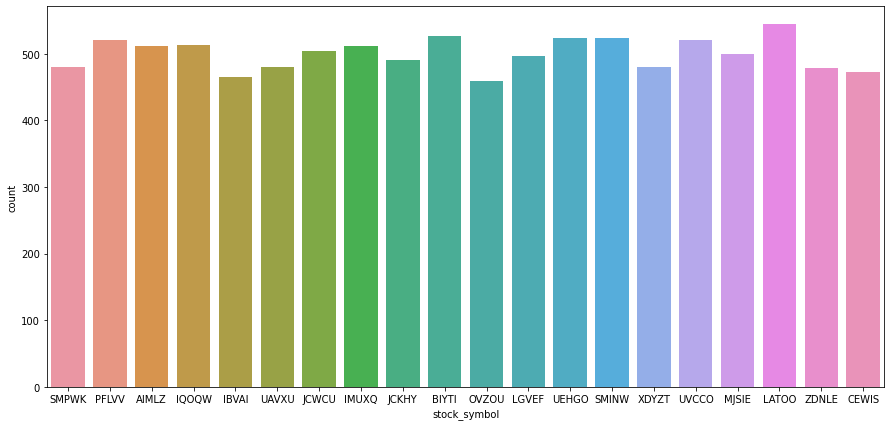

In [89]:
pl.figure(figsize=(15,7))
sns.countplot(x=df['stock_symbol'])
pl.show()